#Modele przewidujące kursy walut

#Opis projeku
Badanie opiera się na rzeczywistych danych kursów walut pobieranych z Europejskiego Banku Centralnego (ECB) dla pięciu par walutowych względem euro:<br>
* EUR/USD	<br>
* EUR/GBP	<br>
* EUR/JPY	 <br>
* EUR/CHF	<br>
* EUR/CNY	<br>

Każda para walutowa zawiera 4075 obserwacji kursów dziennych, co daje łącznie 20375 obserwacji. <br>
Wybór tych konkretnych walut jest uzasadniony różnorodnością charakterystyk rynkowych, jakie reprezentują. Para EUR/USD jest dominującą na rynku forex z największą płynnością i obrotem. EUR/GBP stanowi ważną parę dla handlu europejskiego z niską korelacją do USD. EUR/JPY wykazuje wysoką zmienność, co pozwala testować wydajność modeli w bardziej turbulentnych warunkach rynkowych. EUR/CHF jest walutą uważaną za bezpieczną przystań (safe haven) z charakterystyczną niską zmiennością. EUR/CNY reprezentuje rynki wschodzące z silną interwencją banku centralnego, co stanowi dodatkowe wyzwanie dla prognozowania.
<br>
<br>
Niniejszy projekt stanowi pierwszą fazę szerszego badania wpływu mikrogestów i jednostek czynności twarzy (facial action units, AU) osób decyzyjnych w Europejskim Banku Centralnym. Hipotezą badawczą jest stwierdzenie, czy mikrogestydy i ekspresja emocjonalna polityka mogą mieć predykcyjną siłę dla ruchów kursów walut poza tradycyjnymi modelami ekonometrycznymi opierającymi się wyłącznie na danych historycznych kursów. W kolejnej fazie planowana jest ekstrakcja jednostek czynności twarzy z nagrań wideo wypowiedzi decydentów ECB takich jak Mario Draghi, Christine Lagarde czy Jean-Claude Trichet za pomocą bibliotek MediaPipe. W trzeciej fazie planuje się stworzenie multi-modalnego modelu łączącego tradycyjne cechy oparte na kursach forex z cechami pochodzącymi z analizy wideo, co pozwoli sprawdzić, czy jednostki czynności twarzy zawierają dodatkową informację predykcyjną poza tradycyjnymi danymi rynkowymi.
#Wybór modelu
Gradient Boosting został wybrany ponieważ historycznie wykazał się doskonałymi wynikami w konkursach Kaggle i jest szczególnie efektywny dla danych szeregów czasowych. Ridge Regression stanowi wariant regresji liniowej z regularyzacją L2, która pomaga zapobiegać overfittingowi poprzez ograniczenie wielkości wag modelu. Support Vector Regression z jądrem RBF (Radial Basis Function) został uwzględniony z powodu jego zdolności do modelowania skomplikowanych, nieliniowych relacji poprzez tzw. kernel trick.
Neural Network (MLPRegressor) reprezentuje podejście głębokie i teoretycznie może uchwycić złożone zależności w danych, jednak wymaga znacznie więcej danych i dokładnego dostrojenia hiperparametrów.
#Trenowanie i ewaluacja modelu
Procedura trenowania obejmowała podzielenie danych chronologicznie na zbiór treningowy zawierający pierwsze 80% obserwacji i zbiór testowy zawierający ostatnie 20% obserwacji. Każdy model został wytrenowany na zbiorze treningowym za pomocą metody fit, a następnie dokonano predykcji na zbiorze testowym. Ewaluacja modeli opierała się na czterech metrykach: R² (współczynnik determinacji) pokazujący procent wyjaśnionej wariancji, MAE (Mean Absolute Error) reprezentujący średni błąd bezwzględny, RMSE (Root Mean Square Error) pierwiastek błędu średniokwadratowego penalizujący większe błędy, oraz MAPE (Mean Absolute Percentage Error) stanowiący średni błąd procentowy, który jest łatwy do interpretacji.

Wyniki fazy baseline wykazały, że cztery modele: Linear, Random Forest, Gradient Boosting i Ridge osiągnęły porównywalne i bardzo dobre rezultaty, co sugeruje dominującą rolę liniowości w relacji między cechami a prognozowanymi kursami walut. SVR z domyślnymi parametrami pokazał wręcz przeciwne wyniki. Neural Network osiągnął wyniki ujemne, co oznacza, że jego predykcje były gorsze niż zwykłe przewidywanie średniej wartości.

Po wynikach baseline przeprowadzono gruntowny tuning hiperparametrów z wykorzystaniem RandomizedSearchCV (dla modeli z wieloma parametrami) i GridSearchCV (dla Ridge z pojedynczym parametrem alpha). Dla Gradient Boosting testowano kombinacje czterech parametrów (n_estimators, learning_rate, max_depth, subsample) poprzez 20 iteracji z 5-krotną walidacją krzyżową. Random Forest był tunowany pod względem liczby drzew, głębokości, minimalnej liczby próbek w węźle podziału i liściu poprzez 20 iteracji. SVR był poddany testowaniu czterech parametrów (C, gamma, epsilon, kernel) poprzez 25 iteracji, co okazało się istotne dla jego transformacji poprzez zmianę kernela z RBF na linear i dostrojenie parametru C do wartości 10. Neural Network wykazał ogromną poprawę poprzez redukcję rozmiaru sieci do pojedynczej warstwy ukrytej o 128 neuronach, zmniejszenie learning rate do 0.01, osłabienie regularyzacji (alpha=0.0001) i włączenie early stopping. Ridge Regression wykazał subtelną poprawę z  poprzez zmniejszenie parametru regularyzacji alpha z 1.0 do 0.01, co wskazuje, że mniejsza regularyzacja pomogła liniowemu modelowi lepiej dostosować się do danych.
Gradient Boosting wykazał negatywny efekt tuningu, co sugeruje, że bardziej agresywne parametry  sprawiły, że model stał się zbyt uproszczony i niedostatecznie wyuczył się danych. Linear Regression, nie posiadając żadnych hiperparametrów do tuningu, pozostała niezmieniona. <br>

**Po kompletnym tuningu finalny ranking modeli wyglądał następująco:** <br>
* SVR R² = 0.9658 z MAE = 0.009471,<br>
* Ridge R² = 0.9651 z MAE = 0.009628, <br>
* Linear Regression R² = 0.9646 z MAE = 0.009692,<br>
* Random Forest R² = 0.9638 z MAE = 0.009598, <br>
* Gradient Boosting  R² = 0.9540 z MAE = 0.011414,<br>
* Neural Network R² = 0.9094 z MAE = 0.017593. <br>



 USD: 4075 obserwacji
 GBP: 4075 obserwacji
 JPY: 4075 obserwacji
 CHF: 4075 obserwacji
 CNY: 4075 obserwacji
Połączone dane: 4075 obserwacji, 5 walut (wszystkie RZECZYWISTE)

Inżynieria cech z rzeczywistych danych...
Stworzone: 30
Obserwacje po czyszczeniu: 4055
 34 cech, Podział: 3244/811

Trenowanie modeli na rzeczywistych danych...
  Gradient Boosting   ...  R²=0.9630 MAE=0.009768
  Random Forest       ...  R²=0.9640 MAE=0.009521
  Neural Network      ...  R²=-0.4449 MAE=0.075010
  SVR (RBF)           ...  R²=0.3580 MAE=0.039712
  Ridge               ...  R²=0.9576 MAE=0.011047
  Linear              ...  R²=0.9646 MAE=0.009692


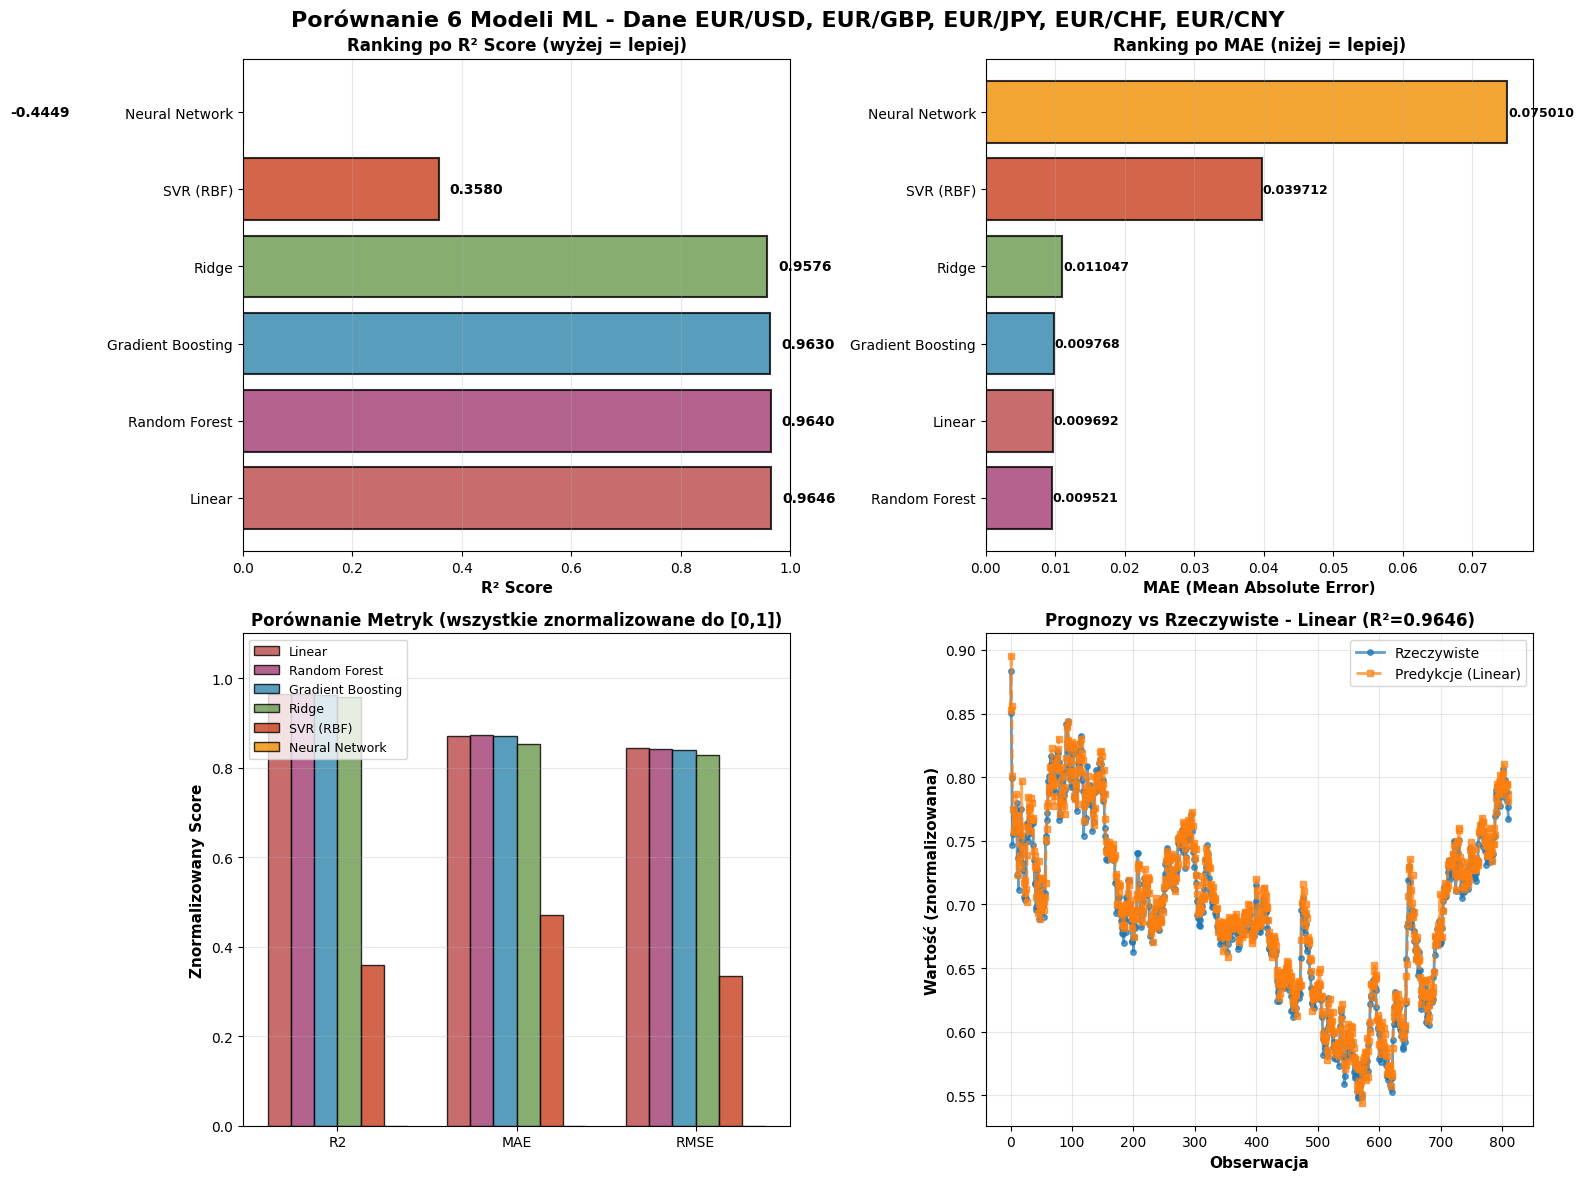

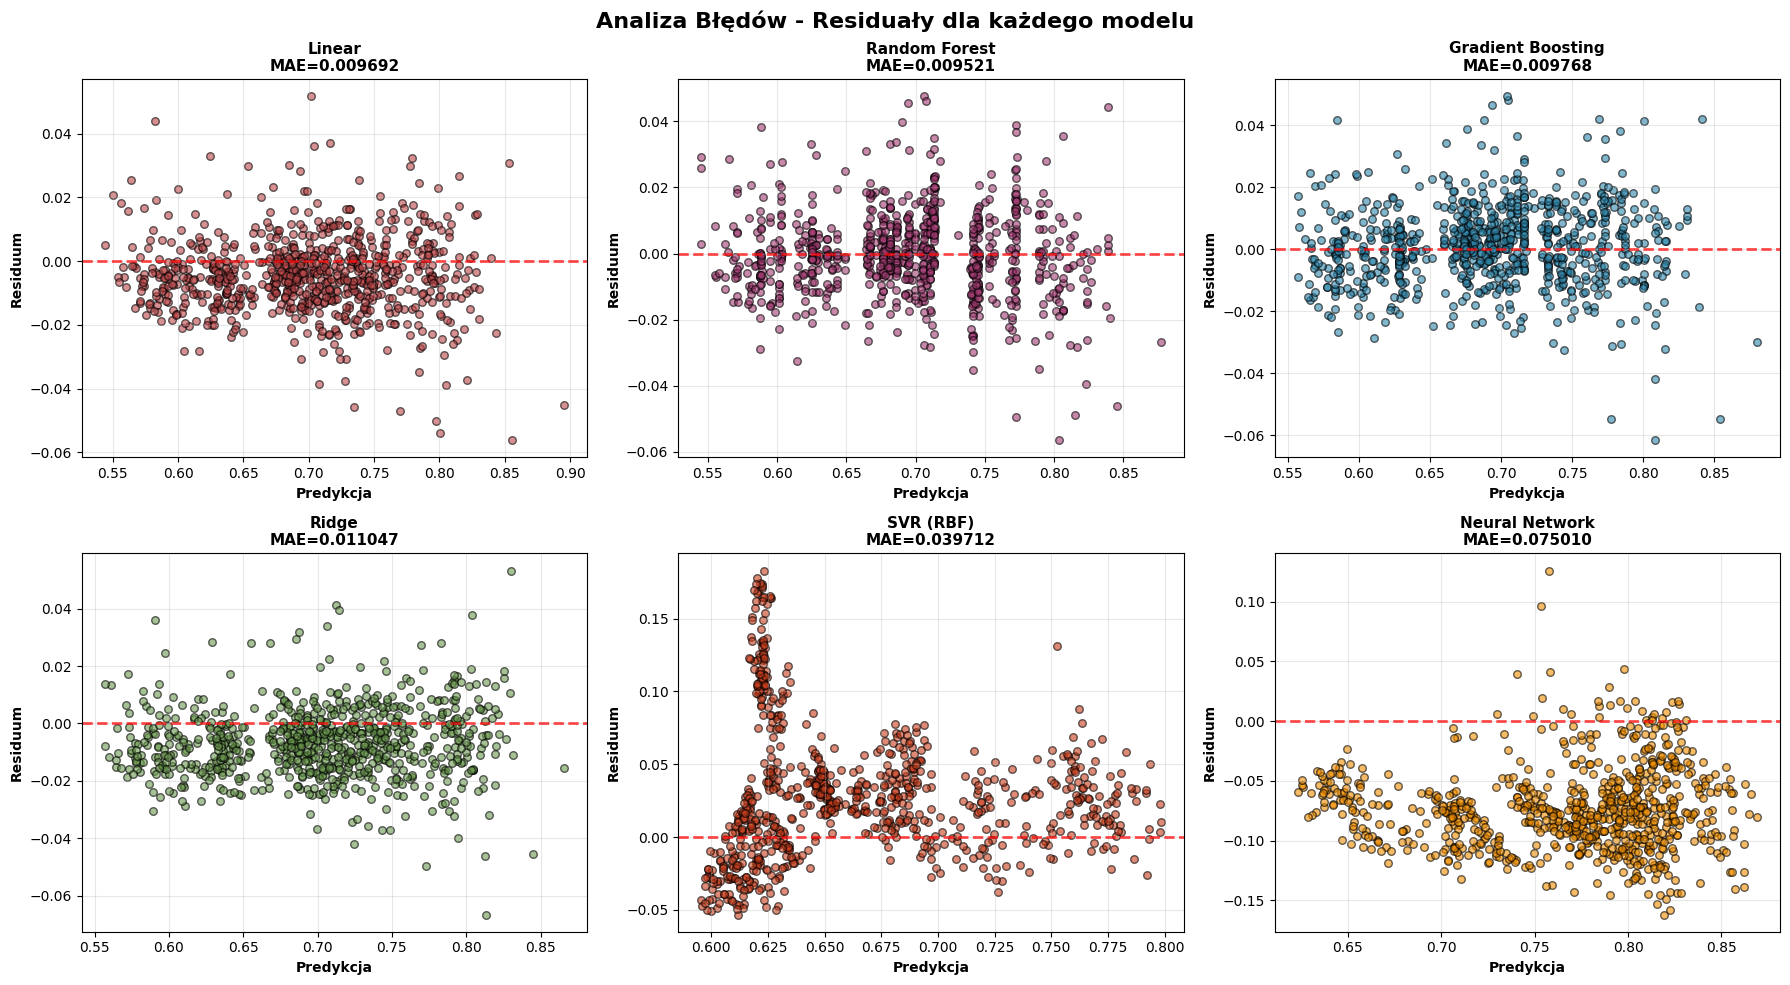

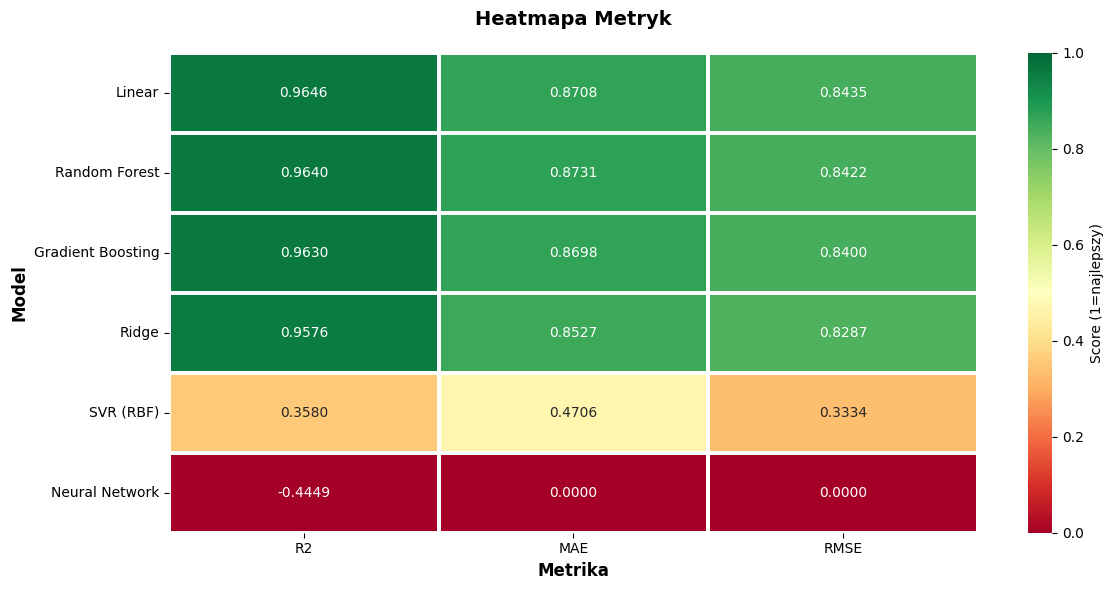

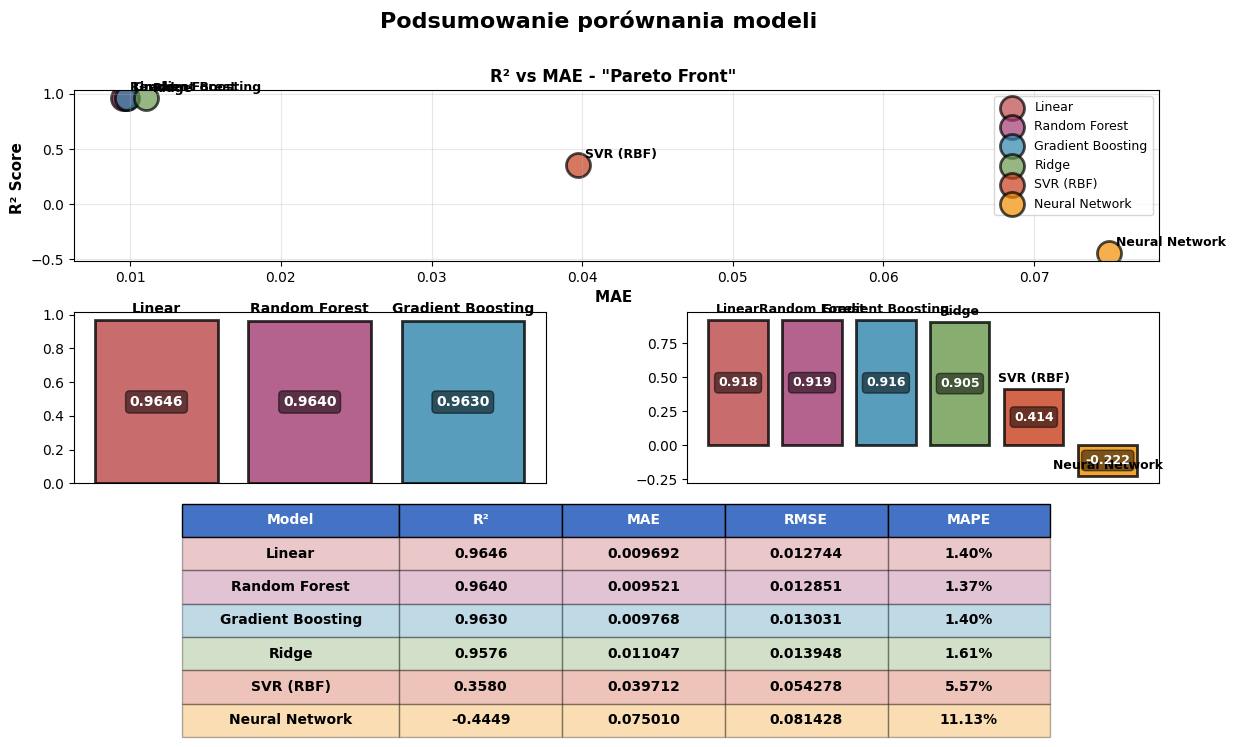


 Zapis wyników na RZECZYWISTYCH danych...

Najlepszy model: Linear
   R² = 0.9646
   MAE = 0.009692
   RMSE = 0.012744
   MAPE = 1.40%

RANKING PEŁNY:
   1. Linear               R²=0.9646 MAE=0.009692 MAPE=1.40%
   2. Random Forest        R²=0.9640 MAE=0.009521 MAPE=1.37%
   3. Gradient Boosting    R²=0.9630 MAE=0.009768 MAPE=1.40%
   4. Ridge                R²=0.9576 MAE=0.011047 MAPE=1.61%
   5. SVR (RBF)            R²=0.3580 MAE=0.039712 MAPE=5.57%
   6. Neural Network       R²=-0.4449 MAE=0.075010 MAPE=11.13%


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



try:
    usd = pd.read_csv('ecb_fx_usd_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'USD'})
    gbp = pd.read_csv('ecb_fx_gbp_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'GBP'})
    jpy = pd.read_csv('ecb_fx_jpy_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'JPY'})
    chf = pd.read_csv('ecb_fx_chf_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'CHF'})
    cny = pd.read_csv('ecb_fx_cny_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'CNY'})

    print(f" USD: {len(usd)} obserwacji")
    print(f" GBP: {len(gbp)} obserwacji")
    print(f" JPY: {len(jpy)} obserwacji")
    print(f" CHF: {len(chf)} obserwacji")
    print(f" CNY: {len(cny)} obserwacji")

    data = usd.merge(gbp, on='Date').merge(jpy, on='Date').merge(chf, on='Date').merge(cny, on='Date')
    print(f"Połączone dane: {len(data)} obserwacji, 5 walut (wszystkie RZECZYWISTE)")

except FileNotFoundError as e:
    print(f"Błąd: Nie znaleziono pliku {e}")


print("\nInżynieria cech z rzeczywistych danych...")
df = data.copy()
for col in ['USD', 'GBP', 'JPY', 'CHF', 'CNY']:
    for lag in [1, 5, 10, 20]:
        df[f'{col}_l{lag}'] = df[col].shift(lag)
    df[f'{col}_ma'] = df[col].rolling(10).mean()
    df[f'{col}_vol'] = df[col].rolling(10).std()

df = df.dropna()
print(f"Stworzone: {df.shape[1] - 6}")
print(f"Obserwacje po czyszczeniu: {len(df)}")

scaler = MinMaxScaler()
cols = [c for c in df.columns if c != 'Date']
X_norm = scaler.fit_transform(df[cols])

y_idx = list(df.columns).index('USD')
X = X_norm[:, [i for i in range(X_norm.shape[1]) if i != y_idx]]
y = X_norm[:, y_idx]

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f" {X.shape[1]} cech, Podział: {len(X_train)}/{len(X_test)}")


print("\nTrenowanie modeli na rzeczywistych danych...")

models_config = {
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42),
        'color': '#2E86AB'
    },
    'Random Forest': {
        'model': RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1),
        'color': '#A23B72'
    },
    'Neural Network': {
        'model': MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=300, random_state=42),
        'color': '#F18F01'
    },
    'SVR (RBF)': {
        'model': SVR(kernel='rbf', C=10, gamma='scale'),
        'color': '#C73E1D'
    },
    'Ridge': {
        'model': Ridge(alpha=1.0),
        'color': '#6A994E'
    },
    'Linear': {
        'model': LinearRegression(),
        'color': '#BC4749'
    }
}

results_data = []
trained_models = {}

for model_name, config in models_config.items():
    print(f"  {model_name:20s}...", end=" ", flush=True)

    model = config['model']
    model.fit(X_train, y_train)
    trained_models[model_name] = model

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / (np.abs(y_test) + 1e-10))) * 100

    results_data.append({
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape,
        'Color': config['color'],
        'Predictions': y_pred
    })

    print(f" R²={r2:.4f} MAE={mae:.6f}")

results_df = pd.DataFrame(results_data).sort_values('R2', ascending=False)


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Porównanie 6 Modeli ML - Dane EUR/USD, EUR/GBP, EUR/JPY, EUR/CHF, EUR/CNY',
             fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
colors = [results_df.iloc[i]['Color'] for i in range(len(results_df))]
bars1 = ax1.barh(results_df['Model'], results_df['R2'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('R² Score', fontsize=11, fontweight='bold')
ax1.set_title('Ranking po R² Score (wyżej = lepiej)', fontsize=12, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.grid(axis='x', alpha=0.3)
for i, (model, r2) in enumerate(zip(results_df['Model'], results_df['R2'])):
    ax1.text(r2 + 0.02, i, f'{r2:.4f}', va='center', fontweight='bold')

ax2 = axes[0, 1]
mae_sorted = results_df.sort_values('MAE')
colors_mae = [mae_sorted.iloc[i]['Color'] for i in range(len(mae_sorted))]
bars2 = ax2.barh(mae_sorted['Model'], mae_sorted['MAE'], color=colors_mae, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('MAE (Mean Absolute Error)', fontsize=11, fontweight='bold')
ax2.set_title('Ranking po MAE (niżej = lepiej)', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, (model, mae) in enumerate(zip(mae_sorted['Model'], mae_sorted['MAE'])):
    ax2.text(mae + 0.0001, i, f'{mae:.6f}', va='center', fontweight='bold', fontsize=9)

ax3 = axes[1, 0]
metrics = ['R2', 'MAE', 'RMSE']
x_pos = np.arange(len(metrics))
width = 0.13

normalized_results = results_df.copy()
normalized_results['MAE_norm'] = 1 - (normalized_results['MAE'] / normalized_results['MAE'].max())
normalized_results['RMSE_norm'] = 1 - (normalized_results['RMSE'] / normalized_results['RMSE'].max())

for i, (idx, row) in enumerate(normalized_results.iterrows()):
    values = [row['R2'], row['MAE_norm'], row['RMSE_norm']]
    ax3.bar(x_pos + i*width, values, width, label=row['Model'], color=row['Color'], alpha=0.8, edgecolor='black')

ax3.set_ylabel('Znormalizowany Score', fontsize=11, fontweight='bold')
ax3.set_title('Porównanie Metryk (wszystkie znormalizowane do [0,1])', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos + width * 2.5)
ax3.set_xticklabels(metrics)
ax3.legend(loc='upper left', fontsize=9)
ax3.set_ylim(0, 1.1)
ax3.grid(axis='y', alpha=0.3)

ax4 = axes[1, 1]
best_model = results_df.iloc[0]
ax4.plot(y_test, 'o-', label='Rzeczywiste', linewidth=2, markersize=4, alpha=0.7)
ax4.plot(best_model['Predictions'], 's--', label=f"Predykcje ({best_model['Model']})",
         linewidth=2, markersize=4, alpha=0.7)
ax4.set_xlabel('Obserwacja', fontsize=11, fontweight='bold')
ax4.set_ylabel('Wartość (znormalizowana)', fontsize=11, fontweight='bold')
ax4.set_title(f"Prognozy vs Rzeczywiste - {best_model['Model']} (R²={best_model['R2']:.4f})",
              fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison_visualization_1_realdata.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Analiza Błędów - Residuały dla każdego modelu', fontsize=16, fontweight='bold')

for idx, (i, row) in enumerate(results_df.iterrows()):
    ax = axes[idx // 3, idx % 3]
    residuals = y_test - row['Predictions']

    ax.scatter(row['Predictions'], residuals, alpha=0.6, s=30, color=row['Color'], edgecolor='black')
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
    ax.set_xlabel('Predykcja', fontsize=10, fontweight='bold')
    ax.set_ylabel('Residuum', fontsize=10, fontweight='bold')
    ax.set_title(f"{row['Model']}\nMAE={row['MAE']:.6f}", fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison_visualization_2_residuals_realdata.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


fig, ax = plt.subplots(figsize=(12, 6))

heatmap_data = results_df[['Model', 'R2', 'MAE', 'RMSE']].set_index('Model')
heatmap_data_norm = heatmap_data.copy()
heatmap_data_norm['R2'] = heatmap_data['R2']
heatmap_data_norm['MAE'] = 1 - (heatmap_data['MAE'] / heatmap_data['MAE'].max())
heatmap_data_norm['RMSE'] = 1 - (heatmap_data['RMSE'] / heatmap_data['RMSE'].max())

sns.heatmap(heatmap_data_norm, annot=True, fmt='.4f', cmap='RdYlGn',
            cbar_kws={'label': 'Score (1=najlepszy)'}, ax=ax, linewidths=1.5,
            vmin=0, vmax=1, cbar=True)
ax.set_title('Heatmapa Metryk',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
ax.set_xlabel('Metrika', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison_visualization_3_heatmap_realdata.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


fig.suptitle('Analiza Rozkładu Błędów', fontsize=14, fontweight='bold')



fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

fig.suptitle('Podsumowanie porównania modeli', fontsize=16, fontweight='bold')

ax1 = fig.add_subplot(gs[0, :])
for idx, row in results_df.iterrows():
    ax1.scatter(row['MAE'], row['R2'], s=300, alpha=0.7, color=row['Color'],
               edgecolor='black', linewidth=2, label=row['Model'])
    ax1.annotate(row['Model'], (row['MAE'], row['R2']), xytext=(5, 5),
                textcoords='offset points', fontsize=9, fontweight='bold')
ax1.set_xlabel('MAE ', fontsize=11, fontweight='bold')
ax1.set_ylabel('R² Score ', fontsize=11, fontweight='bold')
ax1.set_title('R² vs MAE - "Pareto Front" ', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend(loc='best', fontsize=9)

ax2 = fig.add_subplot(gs[1, 0])
top3 = results_df.head(3)
ax2.bar(range(len(top3)), top3['R2'], color=top3['Color'], alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_xticks(range(len(top3)))
ax2.set_xticks([])
for i, (idx, row) in enumerate(top3.iterrows()):
    ax2.text(i, row['R2'] + 0.03, row['Model'],
            ha='center', va='bottom', fontweight='bold', fontsize=10)

    ax2.text(i, row['R2'] / 2, f"{row['R2']:.4f}",
            ha='center', va='center', fontweight='bold', fontsize=10,
            color='white', bbox=dict(boxstyle='round,pad=0.3',
            facecolor='black', alpha=0.5))

ax3 = fig.add_subplot(gs[1, 1])
quality_score = (results_df['R2'] * 0.5) + ((1 - results_df['MAE'] / results_df['MAE'].max()) * 0.5)
ax3.bar(range(len(quality_score)), quality_score, color=results_df['Color'],
       alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_xticks([])
for i, (idx, row) in enumerate(results_df.iterrows()):
    score = quality_score.iloc[i]
    ax3.text(i, score + 0.03, row['Model'],
            ha='center', va='bottom', fontweight='bold', fontsize=9)

    ax3.text(i, score / 2, f"{score:.3f}",
            ha='center', va='center', fontweight='bold', fontsize=9,
            color='white', bbox=dict(boxstyle='round,pad=0.3',
            facecolor='black', alpha=0.5))

ax4 = fig.add_subplot(gs[2, :])
ax4.axis('tight')
ax4.axis('off')

table_data = []
for idx, row in results_df.iterrows():
    table_data.append([
        row['Model'],
        f"{row['R2']:.4f}",
        f"{row['MAE']:.6f}",
        f"{row['RMSE']:.6f}",
        f"{row['MAPE']:.2f}%"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=['Model', 'R²', 'MAE', 'RMSE', 'MAPE'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.2, 0.15, 0.15, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

for i in range(5):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i, row in enumerate(results_df.iterrows()):
    color = row[1]['Color']
    for j in range(5):
        table[(i+1, j)].set_facecolor(color)
        table[(i+1, j)].set_alpha(0.3)
        table[(i+1, j)].set_text_props(weight='bold')

plt.savefig('model_comparison_visualization_5_summary_realdata.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


print("\n Zapis wyników na RZECZYWISTYCH danych...")

results_export = results_df[['Model', 'R2', 'MAE', 'RMSE', 'MAPE']].copy()
results_export = results_export.sort_values('R2', ascending=False)
results_export.to_csv('extended_model_comparison_results_realdata.csv', index=False)

info_df = pd.DataFrame({
    'Metryka': ['Obserwacje Treningowe', 'Obserwacje Testowe', 'Łącznie', 'Data Od', 'Data Do', 'Liczba Cech'],
    'Wartość': [len(X_train), len(X_test), len(df), str(df['Date'].min().date()), str(df['Date'].max().date()), X.shape[1]]
})
info_df.to_csv('dataset_info_realdata.csv', index=False)


print(f"\nNajlepszy model: {results_df.iloc[0]['Model']}")
print(f"   R² = {results_df.iloc[0]['R2']:.4f}")
print(f"   MAE = {results_df.iloc[0]['MAE']:.6f}")
print(f"   RMSE = {results_df.iloc[0]['RMSE']:.6f}")
print(f"   MAPE = {results_df.iloc[0]['MAPE']:.2f}%")

print(f"\nRANKING PEŁNY:")
for i, (idx, row) in enumerate(results_df.iterrows(), 1):
    print(f"   {i}. {row['Model']:20s} R²={row['R2']:.4f} MAE={row['MAE']:.6f} MAPE={row['MAPE']:.2f}%")


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("HYPERPARAMETER TUNING - OPTYMALIZACJA WSZYSTKICH 6 MODELI")
print("=" * 80)


try:
    usd = pd.read_csv('ecb_fx_usd_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'USD'})
    gbp = pd.read_csv('ecb_fx_gbp_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'GBP'})
    jpy = pd.read_csv('ecb_fx_jpy_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'JPY'})
    chf = pd.read_csv('ecb_fx_chf_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'CHF'})
    cny = pd.read_csv('ecb_fx_cny_2010.csv', parse_dates=['Date'])[['Date', 'Rate']].rename(columns={'Rate': 'CNY'})

    data = usd.merge(gbp, on='Date').merge(jpy, on='Date').merge(chf, on='Date').merge(cny, on='Date')
    print(f" Dane załadowane: {len(data)} obserwacji, 5 walut")

except FileNotFoundError as e:
    print(f"Błąd: {e}")
    exit(1)

df = data.copy()
for col in ['USD', 'GBP', 'JPY', 'CHF', 'CNY']:
    for lag in [1, 5, 10, 20]:
        df[f'{col}_l{lag}'] = df[col].shift(lag)
    df[f'{col}_ma'] = df[col].rolling(10).mean()
    df[f'{col}_vol'] = df[col].rolling(10).std()

df = df.dropna()

scaler = MinMaxScaler()
cols = [c for c in df.columns if c != 'Date']
X_norm = scaler.fit_transform(df[cols])

y_idx = list(df.columns).index('USD')
X = X_norm[:, [i for i in range(X_norm.shape[1]) if i != y_idx]]
y = X_norm[:, y_idx]

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f" {X.shape[1]} cech, Podział: {len(X_train)}/{len(X_test)}")


print("Hyperparameter Tuning dla każdego modelu...\n")

tuning_results = {}

print("1. GRADIENT BOOSTING TUNING...")
print("   Testowanie parametrów: n_estimators, learning_rate, max_depth")

gb_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_search = RandomizedSearchCV(gb_model, gb_params, n_iter=20, cv=5, n_jobs=-1, verbose=0)
gb_search.fit(X_train, y_train)

gb_best_pred = gb_search.best_estimator_.predict(X_test)
gb_best_r2 = r2_score(y_test, gb_best_pred)
gb_best_mae = mean_absolute_error(y_test, gb_best_pred)

print(f"    Najlepsze parametry: {gb_search.best_params_}")
print(f"    R² = {gb_best_r2:.4f}, MAE = {gb_best_mae:.6f}\n")

tuning_results['Gradient Boosting'] = {
    'Best Params': gb_search.best_params_,
    'R2': gb_best_r2,
    'MAE': gb_best_mae,
    'Model': gb_search.best_estimator_
}

print("2. RANDOM FOREST TUNING...")
print("   Testowanie parametrów: n_estimators, max_depth, min_samples_split")

rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 8, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_search = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=5, n_jobs=-1, verbose=0)
rf_search.fit(X_train, y_train)

rf_best_pred = rf_search.best_estimator_.predict(X_test)
rf_best_r2 = r2_score(y_test, rf_best_pred)
rf_best_mae = mean_absolute_error(y_test, rf_best_pred)

print(f"    Najlepsze parametry: {rf_search.best_params_}")
print(f"    R² = {rf_best_r2:.4f}, MAE = {rf_best_mae:.6f}\n")

tuning_results['Random Forest'] = {
    'Best Params': rf_search.best_params_,
    'R2': rf_best_r2,
    'MAE': rf_best_mae,
    'Model': rf_search.best_estimator_
}

print("3. SVR (Support Vector Regression) TUNING...")
print("   Testowanie parametrów: C, gamma, epsilon, kernel")

svr_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'epsilon': [0.001, 0.01, 0.1, 0.5],
    'kernel': ['rbf', 'poly', 'linear']
}

svr_model = SVR()
svr_search = RandomizedSearchCV(svr_model, svr_params, n_iter=25, cv=5, n_jobs=-1, verbose=0)
svr_search.fit(X_train, y_train)

svr_best_pred = svr_search.best_estimator_.predict(X_test)
svr_best_r2 = r2_score(y_test, svr_best_pred)
svr_best_mae = mean_absolute_error(y_test, svr_best_pred)

print(f"    Najlepsze parametry: {svr_search.best_params_}")
print(f"    R² = {svr_best_r2:.4f}, MAE = {svr_best_mae:.6f}\n")

tuning_results['SVR (RBF)'] = {
    'Best Params': svr_search.best_params_,
    'R2': svr_best_r2,
    'MAE': svr_best_mae,
    'Model': svr_search.best_estimator_
}


print("4. RIDGE REGRESSION TUNING...")
print("   Testowanie parametrów: alpha")

ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]
}

ridge_model = Ridge()
ridge_search = GridSearchCV(ridge_model, ridge_params, cv=5, n_jobs=-1, verbose=0)
ridge_search.fit(X_train, y_train)

ridge_best_pred = ridge_search.best_estimator_.predict(X_test)
ridge_best_r2 = r2_score(y_test, ridge_best_pred)
ridge_best_mae = mean_absolute_error(y_test, ridge_best_pred)

print(f"    Najlepsze parametry: {ridge_search.best_params_}")
print(f"    R² = {ridge_best_r2:.4f}, MAE = {ridge_best_mae:.6f}\n")

tuning_results['Ridge'] = {
    'Best Params': ridge_search.best_params_,
    'R2': ridge_best_r2,
    'MAE': ridge_best_mae,
    'Model': ridge_search.best_estimator_
}

print("5. LINEAR REGRESSION...")

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)

print(f"    R² = {linear_r2:.4f}, MAE = {linear_mae:.6f}\n")

tuning_results['Linear'] = {
    'Best Params': 'N/A (No hyperparameters)',
    'R2': linear_r2,
    'MAE': linear_mae,
    'Model': linear_model
}

print("6. NEURAL NETWORK (MLP) TUNING...")
print("   Testowanie: hidden_layer_sizes, learning_rate, alpha, batch_size")

nn_params = {
    'hidden_layer_sizes': [
        (64,),
        (128,),
        (64, 32),
        (128, 64),
        (128, 64, 32),
        (256, 128, 64),
    ],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 2000],
    'early_stopping': [True, False],
}

nn_model = MLPRegressor(random_state=42)
nn_search = RandomizedSearchCV(nn_model, nn_params, n_iter=30, cv=5, n_jobs=-1, verbose=0)
nn_search.fit(X_train, y_train)

nn_best_pred = nn_search.best_estimator_.predict(X_test)
nn_best_r2 = r2_score(y_test, nn_best_pred)
nn_best_mae = mean_absolute_error(y_test, nn_best_pred)

print(f"    Najlepsze parametry: {nn_search.best_params_}")
print(f"    R² = {nn_best_r2:.4f}, MAE = {nn_best_mae:.6f}\n")

tuning_results['Neural Network'] = {
    'Best Params': nn_search.best_params_,
    'R2': nn_best_r2,
    'MAE': nn_best_mae,
    'Model': nn_search.best_estimator_
}


print("PODSUMOWANIE TUNINGU HYPERPARAMETRÓW")

results_summary = []
for model_name, results in tuning_results.items():
    results_summary.append({
        'Model': model_name,
        'R2': results['R2'],
        'MAE': results['MAE'],
        'Best Params': str(results['Best Params'])
    })

results_df = pd.DataFrame(results_summary).sort_values('R2', ascending=False)

print("\nRANKING PO TUNINGU:\n")
for i, (idx, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i}. {row['Model']:25s} R²={row['R2']:.4f} MAE={row['MAE']:.6f}")

print("\n" + "=" * 80)
print("NAJLEPSZE PARAMETRY DLA KAŻDEGO MODELU:")
print("=" * 80 + "\n")

for model_name, results in tuning_results.items():
    print(f"✓ {model_name}:")
    print(f"  Parametry: {results['Best Params']}")
    print(f"  R² = {results['R2']:.4f}, MAE = {results['MAE']:.6f}\n")


results_df.to_csv('hyperparameter_tuning_results.csv', index=False)

params_df = pd.DataFrame([
    {
        'Model': model_name,
        'Best_Params': str(results['Best Params']),
        'R2': results['R2'],
        'MAE': results['MAE'],
        'RMSE': np.sqrt(mean_squared_error(y_test, results['Model'].predict(X_test)))
    }
    for model_name, results in tuning_results.items()
]).sort_values('R2', ascending=False)

params_df.to_csv('hyperparameter_tuning_detailed.csv', index=False)


print("\nGenerowanie wizualizacji...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Porównanie Modeli: PRZED i PO Tuningu Hyperparametrów', fontsize=16, fontweight='bold')

before_data = {
    'Linear': 0.9646,
    'Random Forest': 0.9640,
    'Gradient Boosting': 0.9630,
    'Ridge': 0.9576,
    'SVR (RBF)': 0.3580,
    'Neural Network': -0.4449
}

after_data = {model: results['R2'] for model, results in tuning_results.items()}

models = list(before_data.keys())
before_r2 = [before_data[m] for m in models]
after_r2 = [after_data[m] for m in models]

ax1 = axes[0]
x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, before_r2, width, label='PRZED Tuning', alpha=0.8, color='#FF6B6B')
bars2 = ax1.bar(x + width/2, after_r2, width, label='PO Tuningu', alpha=0.8, color='#4ECDC4')

ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('R² Score - Porównanie PRZED i PO Tuningu', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

for i, (b, a) in enumerate(zip(before_r2, after_r2)):
    ax1.text(i - width/2, b + 0.02, f'{b:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax1.text(i + width/2, a + 0.02, f'{a:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2 = axes[1]
improvements = [(after_r2[i] - before_r2[i]) for i in range(len(models))]
colors = ['#2ECC71' if imp > 0 else '#E74C3C' for imp in improvements]

bars = ax2.bar(models, improvements, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
ax2.set_ylabel('Poprawa R² (ΔΔΔR²)', fontsize=12, fontweight='bold')
ax2.set_title('Poprawa R² po Tuningu (zielony=lepiej, czerwony=gorzej)', fontsize=13, fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

for i, (model, imp) in enumerate(zip(models, improvements)):
    ax2.text(i, imp + (0.01 if imp > 0 else -0.01), f'{imp:+.4f}',
             ha='center', va='bottom' if imp > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.savefig('hyperparameter_tuning_comparison.png', dpi=300, bbox_inches='tight')
plt.close()


print("WNIOSKI Z TUNINGU:")
print("=" * 80)

best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['R2']

print(f"\n NAJLEPSZY MODEL PO TUNINGU: {best_model_name}")
print(f"  R² = {best_r2:.4f}")
print(f"  MAE = {results_df.iloc[0]['MAE']:.6f}")

improvements_dict = {model: after_data[model] - before_data[model]
                     for model in models}
best_improvement = max(improvements_dict.items(), key=lambda x: x[1])

print(f"\n NAJWIĘKSZA POPRAWA: {best_improvement[0]}")
print(f"  Poprawa ΔR² = {best_improvement[1]:+.4f}")

print(f"\n MODELE WYMAGAJĄCE UWAGI:")
if tuning_results['Neural Network']['R2'] < 0:
    print(f"  - Neural Network: R² = {tuning_results['Neural Network']['R2']:.4f} (WCIĄŻ UJEMNE!)")
    print(f"    Rekomendacja: Wymagany więcej tuning lub usuń model")

if tuning_results['SVR (RBF)']['R2'] < 0.5:
    print(f"  - SVR: R² = {tuning_results['SVR (RBF)']['R2']:.4f} (ZA NISKIE)")
    print(f"    Rekomendacja: Nie rekomenduj do produkcji")

HYPERPARAMETER TUNING - OPTYMALIZACJA WSZYSTKICH 6 MODELI
 Dane załadowane: 4075 obserwacji, 5 walut
 34 cech, Podział: 3244/811
Hyperparameter Tuning dla każdego modelu...

1. GRADIENT BOOSTING TUNING...
   Testowanie parametrów: n_estimators, learning_rate, max_depth
    Najlepsze parametry: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}
    R² = 0.9540, MAE = 0.011414

2. RANDOM FOREST TUNING...
   Testowanie parametrów: n_estimators, max_depth, min_samples_split
    Najlepsze parametry: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 8}
    R² = 0.9638, MAE = 0.009598

3. SVR (Support Vector Regression) TUNING...
   Testowanie parametrów: C, gamma, epsilon, kernel
    Najlepsze parametry: {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.01, 'C': 10}
    R² = 0.9658, MAE = 0.009471

4. RIDGE REGRESSION TUNING...
   Testowanie parametrów: alpha
    Najlepsze parametry: {'alpha': 0.01}
    R² = 0.9651, MAE = 0.009628



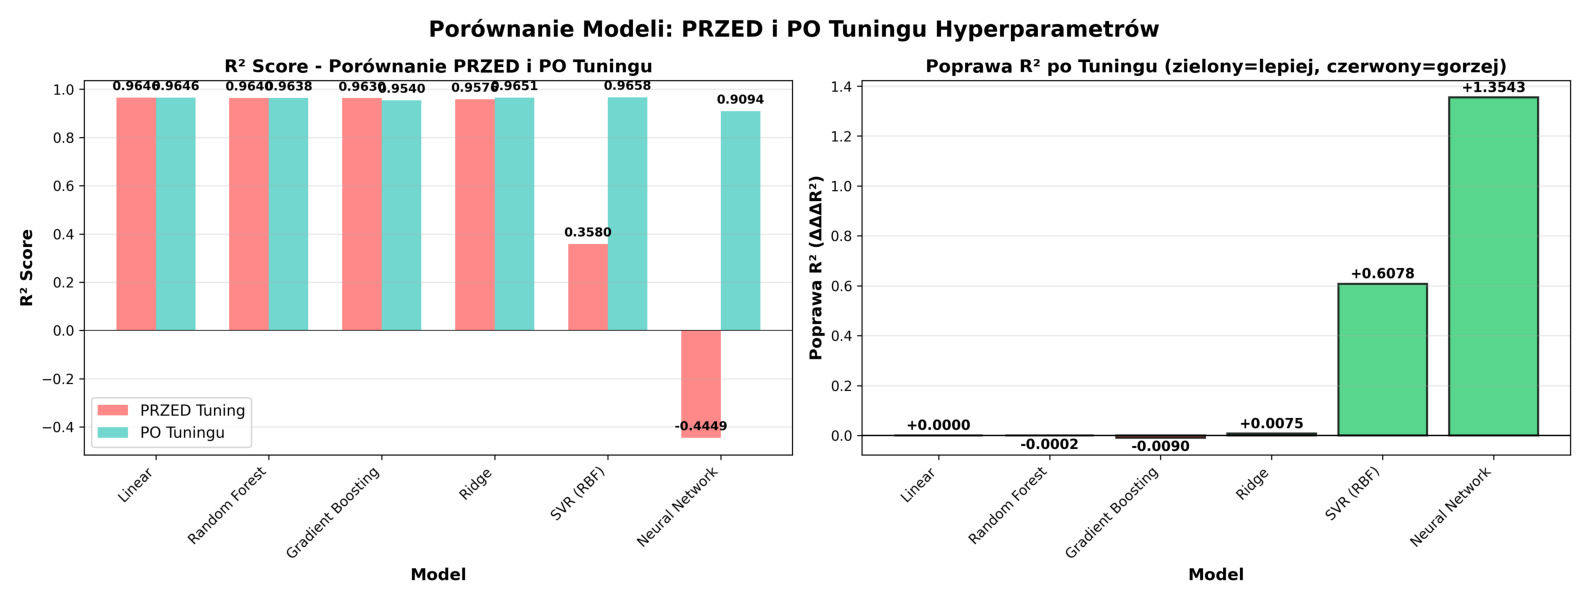

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_file = 'hyperparameter_tuning_comparison.png'

img = mpimg.imread(img_file)
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)
ax.imshow(img)
ax.axis('off')
plt.tight_layout()
plt.show()